In [1]:
import numpy as np
import math
from Grid import Grid 
from MesData import MesData
from ParaviewFile import ParaviewFile

data_4_4 = MesData('Test1_4_4.txt').data
data_31_31 = MesData('Test3_31_31_kwadrat.txt').data
data_mix = MesData('Test2_4_4_MixGrid.txt').data
data_tr_31_31 = MesData('Test4_31_31_trapez.txt').data
gr = Grid(data_4_4)
gr_31_31 = Grid(data_31_31)
gr_mix = Grid(data_mix)
gr_tr_31_31 = Grid(data_tr_31_31)

In [2]:
# ParaviewFile(gr.data, gr.TempinTime).to_file('paraview_data/')
ParaviewFile(gr_31_31.data, gr_31_31.TempinTime).to_file('paraview_data_31_31/')
# ParaviewFile(gr_mix.data, gr_mix.TempinTime).to_file('paraview_data_mix/')

In [4]:
ParaviewFile(gr_tr_31_31.data, gr_tr_31_31.TempinTime).to_file('paraview_data_tr_31_31/')

In [8]:
len(gr_tr_31_31.data['Node'])

961

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


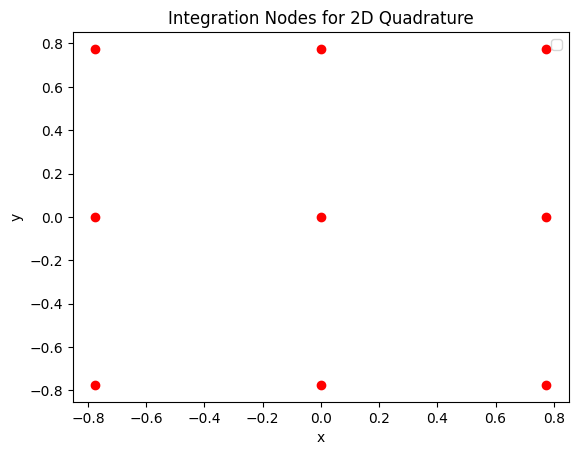

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quadrature

# Определите количество узлов для квадратуры
num_nodes = 3

# Получите узлы и веса интегрирования
nodes_x, weights_x = np.polynomial.legendre.leggauss(num_nodes)
nodes_y, weights_y = np.polynomial.legendre.leggauss(num_nodes)

# Создайте комбинацию узлов и весов для двумерной квадратуры
nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

# Определите функцию, которую вы интегрируете
def integrand(x, y):
    return x**2 + y**2

# Задайте пределы интегрирования
x_lower, x_upper = -1, 1
y_lower, y_upper = -1, 1

# Создайте сетку для отображения интегрируемой функции
x_vals = np.linspace(x_lower, x_upper, 100)
y_vals = np.linspace(y_lower, y_upper, 100)
# X, Y = np.meshgrid(x_vals, y_vals)
# Z = integrand(X, Y)

# Постройте график функции и узлов интегрирования
# plt.contourf(X, Y, Z, cmap="viridis")
plt.scatter(nodes_combinations[:, 0], nodes_combinations[:, 1], color='red', marker='o')
plt.title('Integration Nodes for 2D Quadrature')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
from sympy import N
from Calkowanie import Calkowanie
from itertools import chain

Dot_ranged = []
calkowanie = Calkowanie()
def test_Hbc(n_range, alfa, length):
    dot_nranges = [ np.dot( n_range[i].reshape(4,1), n_range[i].reshape(1,4) ) for i in range( len( n_range))]
    Dot_ranged.append(dot_nranges)
    return alfa * sum(dot_nranges) * length

def L(x, y):
    # x = np.array(x)
    # y = np.array(y)
    # distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    # return distances
    lengths = []
    for first in range(4):
        last = first+1 if first < 3 else 0
        lengths.append( math.sqrt( ( ( x[first] - x[last] )**2 + ( y[first] - y[last] )**2 ) ) )
    return lengths

def Hbc_calulation(x, y, pc, alfa, L_ind):
    lengths = L(x, y)
    
    # lengths = [lengths[3], lengths[0], lengths[1], lengths[2]]
    # lengths = [lengths[0], lengths[-1], lengths[-2], lengths[-3]]
    Hbc = []
    print(lengths)
    for i in range(len(pc)):
        Pcs = pc[i]
        print(Pcs)
        N_range = [ calkowanie.N_range(pc) for pc in Pcs]
        Hbc.append(test_Hbc( N_range, alfa, lengths[L_ind[i]]/2 ) )
    return Hbc

nr = 0
nr_2 = 1
Pc_1 = Grid.PC
# Pc_1 = [Grid.PC[1], Grid.PC[-2]]
# Pc_1 = gr_mix.grid[nr][nr_2].pc
x, y = gr_mix.grid[nr][nr_2].x, gr_mix.grid[nr][nr_2].y
L_ind = [2,3, 2,3]

alfa = data_mix['Alfa']

sum(Hbc_calulation(x,y, Pc_1, alfa, L_ind))

[0.0320377257, 0.03131321868772068, 0.03284953744685464, 0.038389816955117055]
[[1, -0.5773502691896258], [1, 0.5773502691896258]]
[[-0.5773502691896258, 1], [0.5773502691896258, 1]]
[[-1, 0.5773502691896258], [-1, -0.5773502691896258]]
[[-0.5773502691896258, -1], [0.5773502691896258, -1]]


array([[7.12393544, 1.91949085, 0.        , 1.64247687],
       [1.91949085, 7.12393544, 1.64247687, 0.        ],
       [0.        , 1.64247687, 7.12393544, 1.91949085],
       [1.64247687, 0.        , 1.91949085, 7.12393544]])

In [12]:
gr_mix.grid[0][1].L_ind

[0]

In [11]:
gr_mix.grid[nr][nr_2].pc,gr_mix.grid[nr][nr_2].L_ind

([[[-1, 0.5773502691896258], [-1, -0.5773502691896258]]], [0])

In [10]:
L_ind = [0,0,0,0]
for i in Hbc_calulation(x,y, Pc_1, alfa, L_ind):
    print(i)
    print('-----------------')

[0.0320377257, 0.03131321868772068, 0.03284953744685464, 0.038389816955117055]
[[1, -0.5773502691896258], [1, 0.5773502691896258]]
[[-0.5773502691896258, 1], [0.5773502691896258, 1]]
[[-1, 0.5773502691896258], [-1, -0.5773502691896258]]
[[-0.5773502691896258, -1], [0.5773502691896258, -1]]
[[0.         0.         0.         0.        ]
 [0.         3.20377257 1.60188628 0.        ]
 [0.         1.60188628 3.20377257 0.        ]
 [0.         0.         0.         0.        ]]
-----------------
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         3.20377257 1.60188628]
 [0.         0.         1.60188628 3.20377257]]
-----------------
[[3.20377257 0.         0.         1.60188628]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [1.60188628 0.         0.         3.20377257]]
-----------------
[[3.20377257 1.60188628 0.         0.        ]
 [1.60188628 3.20377257 0.         0.    

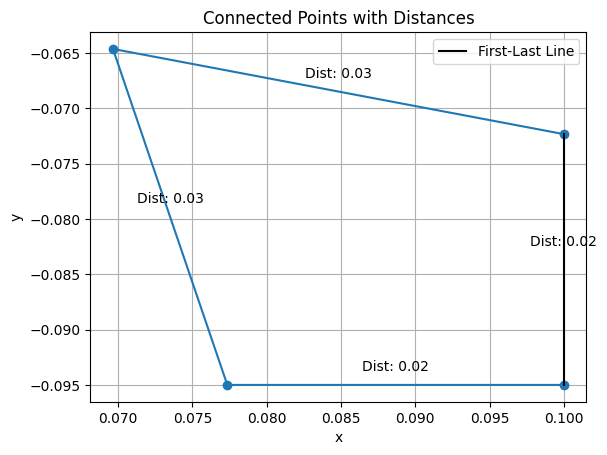

In [4]:
import numpy as np
import matplotlib.pyplot as plt
Dist = []
def calculate_distances_and_plot(x, y):
    # Проверка, что массивы x и y имеют одинаковую длину
    if len(x) != len(y):
        raise ValueError("Массивы x и y должны иметь одинаковую длину")

    # Используем numpy для эффективных вычислений
    x = np.array(x)
    y = np.array(y)

    # Вычисляем расстояния между точками
    distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    Dist.append(distances)
    # Строим график линиями, соединяющими точки
    plt.plot(x, y, marker='o', linestyle='-')

    # Подписываем линии с расстояниями (кроме последней линии)
    for i in range(len(x) - 1):
        plt.annotate(f"Dist: {distances[i]:.2f}",
                     ((x[i] + x[i + 1]) / 2, (y[i] + y[i + 1]) / 2),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Соединяем первую и последнюю точку
    plt.plot([x[0], x[-1]], [y[0], y[-1]], linestyle='-', color='black', label='First-Last Line')

    # Вычисляем и подписываем расстояние между первой и последней точками
    distance_first_last = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
    Dist.append(distance_first_last)
    plt.annotate(f"Dist: {distance_first_last:.2f}",
                 ((x[0] + x[-1]) / 2, (y[0] + y[-1]) / 2),
                 textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Connected Points with Distances')
    plt.grid(True)
    plt.legend()
    plt.show()

# Пример использования
row = 2
col = 0
x, y = gr_mix.grid[row][col].x, gr_mix.grid[row][col].y


calculate_distances_and_plot(x, y)


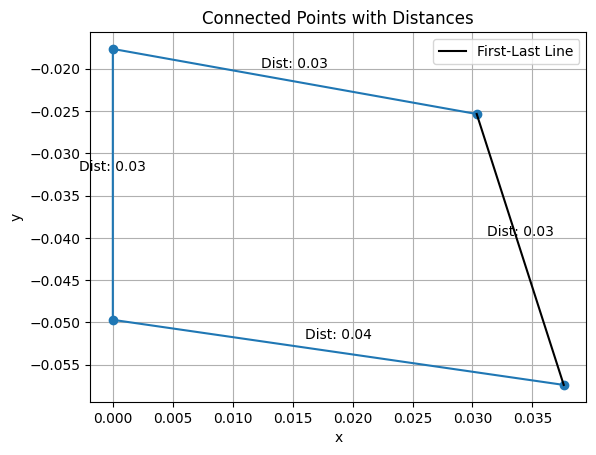

In [13]:
x, y = gr_mix.grid[1][2].x, gr_mix.grid[1][2].y

calculate_distances_and_plot(x, y)

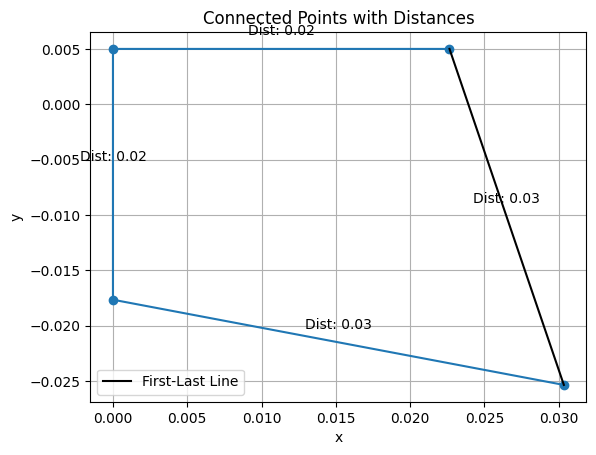

In [14]:
x, y = gr_mix.grid[0][2].x, gr_mix.grid[0][2].y

calculate_distances_and_plot(x, y)

In [145]:
gr_mix.grid[1][0].x, gr_mix.grid[1][0].y

([0.100000001, 0.0546918176, 0.0623899326, 0.100000001],
 [0.00499999989, 0.00499999989, -0.0326100662, -0.0403081849])

In [146]:
gr_mix.grid[row][col].x, gr_mix.grid[row][col].y

([0.100000001, 0.0546918176, 0.0623899326, 0.100000001],
 [0.00499999989, 0.00499999989, -0.0326100662, -0.0403081849])

In [40]:
def L2(x, y):
    x = np.array(x)
    y = np.array(y)
    distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    return distances

In [14]:
int_a = 0 
sum([i  for i in range(901)])

405450